In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt
from matplotlib import cm

plt.rcParams['figure.figsize'] = [10, 10]

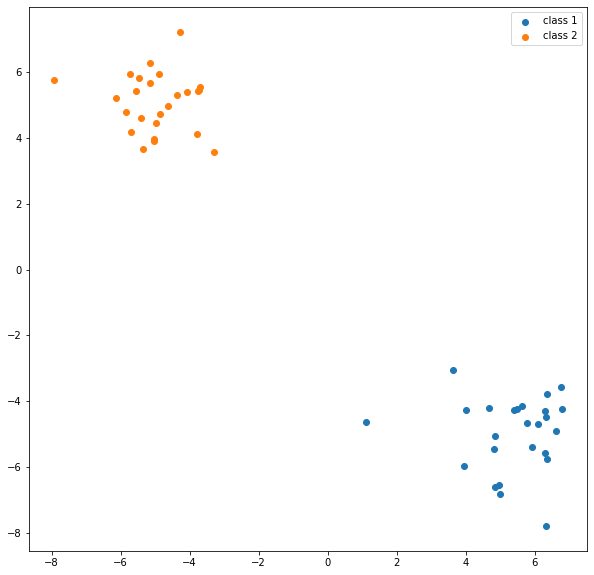

In [2]:
sigma = 1
d= 5
M = 50
def sample(cl) : return rn.normal([d*cl,-d*cl],[sigma,sigma])
def plot(data):
    c1 = data[0]
    c2 = data[1]
    plt.scatter(c1[:,0],c1[:,1])
    plt.scatter(c2[:,0],c2[:,1])
    plt.legend(['class 1','class 2'])
    
class1 = np.array([sample(1) for el in range(M//2)])
class2 = np.array([sample(-1) for el in range(M//2)])
data = [class1, class2]
plot(data)

In [3]:
def plot_surface3d(f,bounds = [-5,5,0.05], data=None,angle=[10, -150]):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # Make data.
    X = np.arange(*bounds)
    Y = np.arange(*bounds)
    X, Y = np.meshgrid(X, Y)
    Z = np.reshape(f(X,Y),X.shape)
    ax.view_init(*angle)

        # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=True, alpha=0.5)
    if data:
        ax.scatter3D(data[0][:,0],data[0][:,1],1)
        ax.scatter3D(data[1][:,0],data[1][:,1],-1)
        
        
def plot_scalarField(f,bounds = [-5,5,0.05], data=None):
    fig, ax = plt.subplots()
    # Make data.
    X = np.arange(*bounds)
    Y = np.arange(*bounds)
    X, Y = np.meshgrid(X, Y)
    Z = np.reshape(f(X,Y),X.shape)

    plt.pcolormesh(X, Y, Z, cmap=cm.coolwarm)
    plt.colorbar()

    if data:
        ax.scatter(data[0][:,0],data[0][:,1])
        ax.scatter(data[1][:,0],data[1][:,1])

In [4]:
def ReLU(x):
    return x * (x > 0) - 1

def SlopedTanh(x):
    return 0.2*x + np.tanh(x)

def Id(x):
    return x

def loss(data,w,model,nl=np.tanh):
    l = 0
    def _l(d,cl):
        return (model(w,d,nl) - cl)**2
    
    for d in np.ndarray.tolist(data[0]):
        l += _l(np.array(d),1)
    for d in np.ndarray.tolist(data[1]):
        l += _l(np.array(d),-1)
        
    return l
def nn(w,x,nl=np.tanh):
    if len(x.shape)>1:
        _in = np.concatenate([x,np.ones((1,x.shape[1]))],axis=0)
    else:
        _in = np.concatenate([x,[1]])
    _act = np.dot(w,_in)
    return nl(_act)

## example of a boundary surface computed by our toy single layer NN

/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


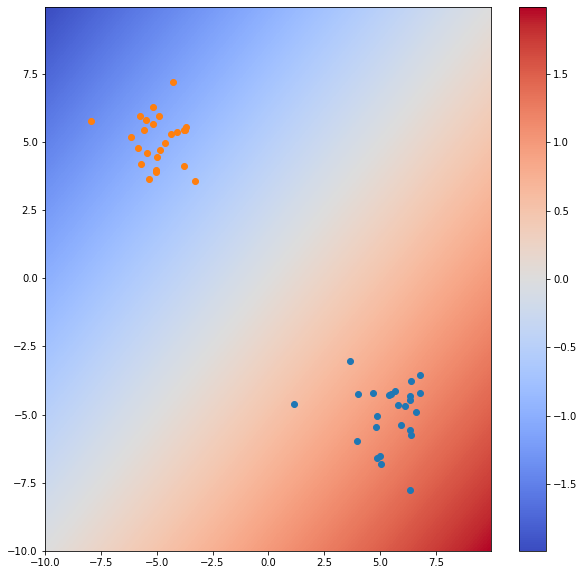

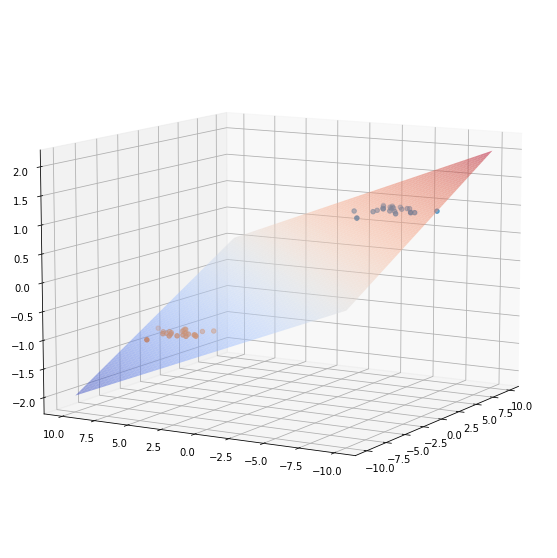

In [5]:

# w = rn.normal([0,0,0],[1,1,1])
w = [0.1,-0.1,0]
def _nn(x,y) : return nn(w,np.array([np.ndarray.flatten(x),np.ndarray.flatten(y)]),Id)
plot_scalarField(_nn,[-10,10,0.05],data)
plot_surface3d(_nn,[-10,10,0.05],data)

/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


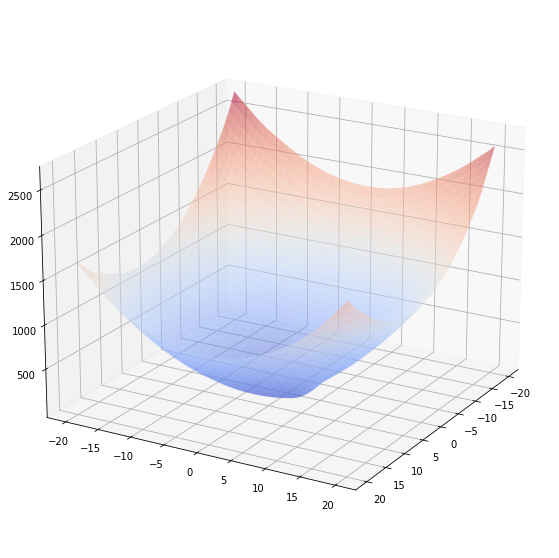

In [6]:
def _loss(wx,wy) : return loss(data,np.array([0.2*np.ndarray.flatten(wx),-0.1,np.ndarray.flatten(wy)]), nn, SlopedTanh)
plot_surface3d(_loss, [-20,20,0.05],angle=[20,30])

/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


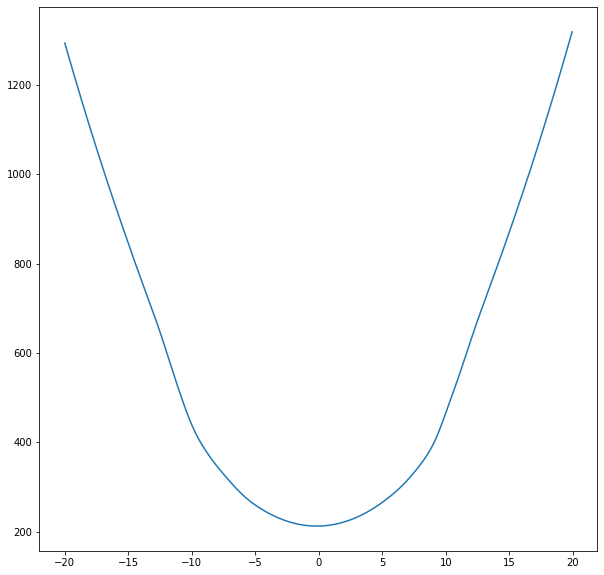

In [7]:
def _lx(x) : return loss(data,np.array([1,-1,x]), nn, SlopedTanh)
bounds = [-20,20,0.05]
_xs = np.arange(*bounds)
plt.plot(_xs,_lx(_xs))


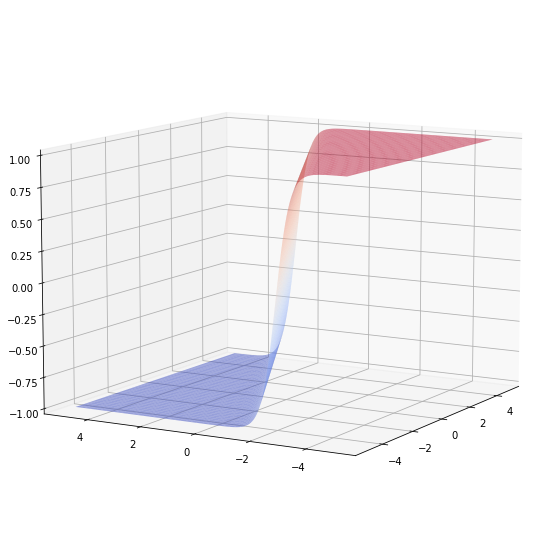

In [8]:
w = np.array([1,-2,0])
def _nn(x,y) : return nn(w,np.array([np.ndarray.flatten(x),np.ndarray.flatten(y)]))
plot_surface3d(_nn)

In [9]:
f = _nn
bounds = [-10,10,0.05]